In [17]:
#Data preprocessing
import pandas as pd
import numpy as np
data = pd.read_csv("./penguins.csv")
feat_names = list(data.keys())

valid_rows = ~pd.isnull(data).to_numpy().any(1)
print(f"After removing incomplete data, {valid_rows.sum()} of {data.shape[0]} samples left")
data = data.to_numpy()[valid_rows, :]




After removing incomplete data, 333 of 344 samples left


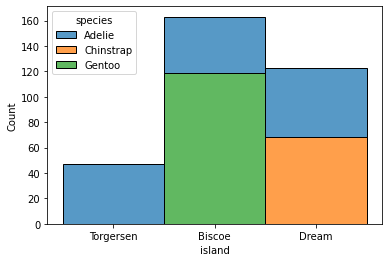

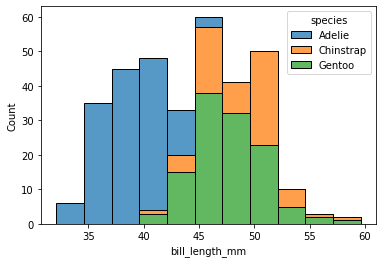

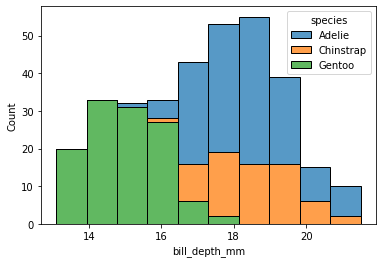

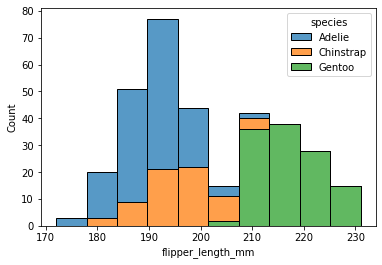

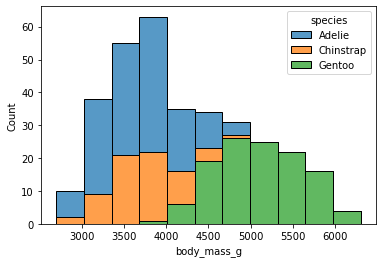

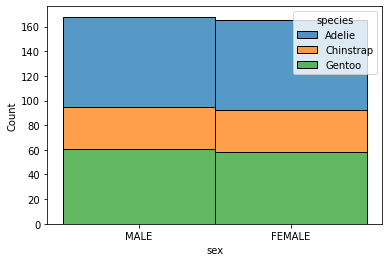

In [18]:
# Viualize data 
import seaborn as sns
import matplotlib.pyplot as plt

data_for_visual = pd.DataFrame(data, columns=feat_names)
for i in range(1, len(feat_names)):
    plt.figure()
    sns.histplot(data=data_for_visual, x=feat_names[i], hue=feat_names[0], multiple="stack")


In [19]:
# Convert string data to float
class_map = dict(Adelie=0, Chinstrap=1, Gentoo=2)
island_map = dict(Torgersen=0., Biscoe=1., Dream=2.)
sex_map = dict(MALE=0., FEMALE=1.)
change_map = dict(species=class_map, island=island_map, sex=sex_map)
for i,n in enumerate(feat_names):
    if n in change_map:
        dic = change_map[n]
        for k,v in dic.items():
            data[data[:, i] == k, i] = v





# Split dataset
import random
split = int(data.shape[0] * 0.75)
idx = list(range(data.shape[0]))
random.shuffle(idx)
data = data[idx, :]
train_data = data[:split, :]
test_data = data[split:, :]
X_train = train_data[:, 1:]
Y_train = train_data[:, 0].astype(np.int32)
X_test = test_data[:, 1:]
Y_test = test_data[:, 0].astype(np.int32)

max depth:3
minimum leaf sizes:1
training error:0.012048192771084338
testing error:0.047619047619047616
max depth:3
minimum leaf sizes:5
training error:0.0321285140562249
testing error:0.05952380952380952
max depth:3
minimum leaf sizes:25
training error:0.04819277108433735
testing error:0.07142857142857142
max depth:5
minimum leaf sizes:1
training error:0.0
testing error:0.047619047619047616
max depth:5
minimum leaf sizes:5
training error:0.0321285140562249
testing error:0.05952380952380952
max depth:5
minimum leaf sizes:25
training error:0.04819277108433735
testing error:0.07142857142857142
max depth:None
minimum leaf sizes:1
training error:0.0
testing error:0.047619047619047616
max depth:None
minimum leaf sizes:5
training error:0.0321285140562249
testing error:0.05952380952380952
max depth:None
minimum leaf sizes:25
training error:0.04819277108433735
testing error:0.07142857142857142


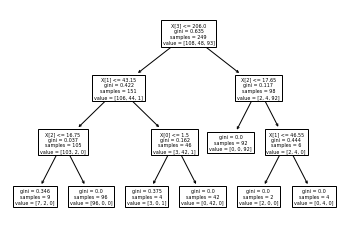

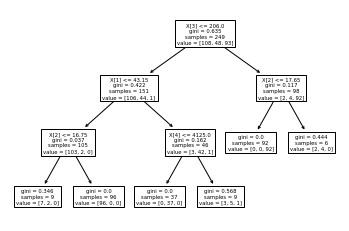

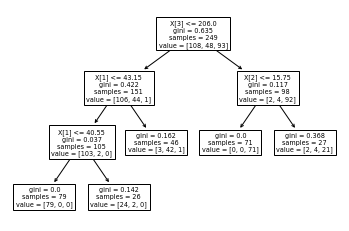

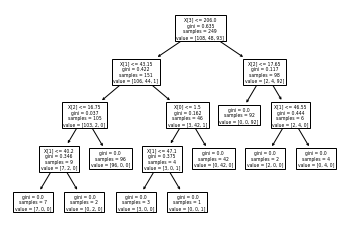

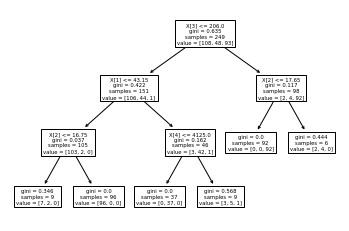

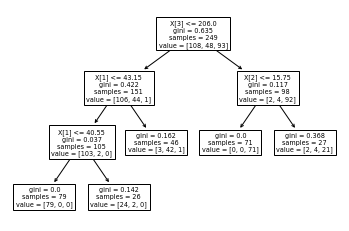

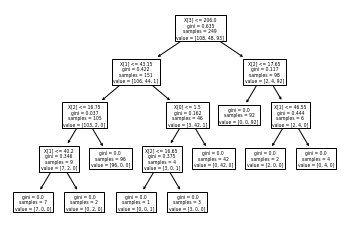

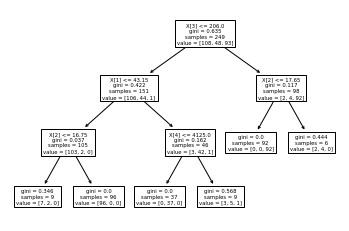

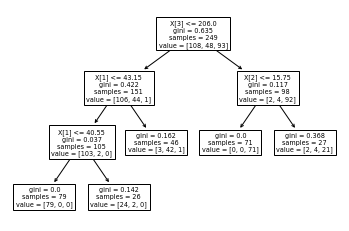

In [20]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree


max_depths = [3, 5, None]
leaf_sizes = [1, 5, 25]



for d in max_depths:
    for l in leaf_sizes:
        model = DecisionTreeClassifier(max_depth=d, min_samples_leaf=l)
        model.fit(X_train, Y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_error = (train_pred != Y_train).mean()
        test_error = (test_pred != Y_test).mean()
        print(f"========================")
        print(f"max depth:{d}")
        print(f"minimum leaf sizes:{l}")
        print(f"training error:{train_error}")
        print(f"testing error:{test_error}")
        
        plt.figure()
        plot_tree(model)



In [21]:
# Bagging
from sklearn.ensemble import BaggingClassifier


max_depths = [3, 5, None]
num_trees = [5, 10, 50]


for n in num_trees:
    for d in max_depths:
        model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=d), n_estimators=n)
        model.fit(X_train, Y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_error = (train_pred != Y_train).mean()
        test_error = (test_pred != Y_test).mean()
        print(f"========================")
        print(f"number of tree:{n}")
        print(f"max depth:{d}")
        print(f"training error:{train_error}")
        print(f"testing error:{test_error}")
        



number of tree:5
max depth:3
training error:0.008032128514056224
testing error:0.05952380952380952
number of tree:5
max depth:5
training error:0.004016064257028112
testing error:0.023809523809523808
number of tree:5
max depth:None
training error:0.008032128514056224
testing error:0.05952380952380952
number of tree:10
max depth:3
training error:0.012048192771084338
testing error:0.047619047619047616
number of tree:10
max depth:5
training error:0.0
testing error:0.047619047619047616
number of tree:10
max depth:None
training error:0.0
testing error:0.047619047619047616
number of tree:50
max depth:3
training error:0.008032128514056224
testing error:0.047619047619047616
number of tree:50
max depth:5
training error:0.0
testing error:0.047619047619047616
number of tree:50
max depth:None
training error:0.0
testing error:0.047619047619047616


In [22]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

num_trees = [5, 10, 50]
num_feat = [1, 3, 6]



for n in num_trees:
    for m in num_feat:
        model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n, max_features=m)
        model.fit(X_train, Y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_error = (train_pred != Y_train).mean()
        test_error = (test_pred != Y_test).mean()
        print(f"========================")
        print(f"number of tree:{n}")
        print(f"number of features:{m}")
        print(f"training error:{train_error}")
        print(f"testing error:{test_error}")


number of tree:5
number of features:1
training error:0.1566265060240964
testing error:0.30952380952380953
number of tree:5
number of features:3
training error:0.012048192771084338
testing error:0.09523809523809523
number of tree:5
number of features:6
training error:0.004016064257028112
testing error:0.03571428571428571
number of tree:10
number of features:1
training error:0.11646586345381527
testing error:0.20238095238095238
number of tree:10
number of features:3
training error:0.0
testing error:0.047619047619047616
number of tree:10
number of features:6
training error:0.004016064257028112
testing error:0.047619047619047616
number of tree:50
number of features:1
training error:0.040160642570281124
testing error:0.17857142857142858
number of tree:50
number of features:3
training error:0.0
testing error:0.03571428571428571
number of tree:50
number of features:6
training error:0.0
testing error:0.047619047619047616


100%|██████████| 21/21 [03:33<00:00, 10.19s/it]


Text(0, 0.5, 'variance value')

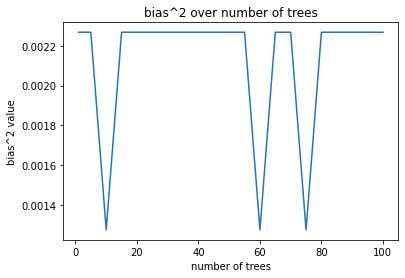

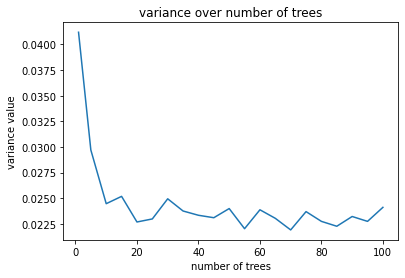

In [23]:
# Bias-Variance
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
from tqdm import tqdm

num_trees = [1] + list(range(5, 101, 5))


bias2s = []
vars = []

for n in tqdm(num_trees):
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n, max_features=m)
    model.fit(X_train, Y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_error = (train_pred != Y_train).mean()
    test_error = (test_pred != Y_test).mean()
    _, bias, var = bias_variance_decomp(model, X_train, Y_train, X_test, Y_test, loss='0-1_loss')
    bias2s.append(bias * bias)
    vars.append(var)



plt.figure()
plt.plot(num_trees, bias2s)
plt.title("bias^2 over number of trees")
plt.xlabel("number of trees")
plt.ylabel("bias^2 value")



plt.figure()
plt.plot(num_trees, vars)
plt.title("variance over number of trees")
plt.xlabel("number of trees")
plt.ylabel("variance value")